## Loan classification

This case study addresses a very common problem in the Banking industry. "To approve or reject this loan application?". The bank executives rely on extensive background checks to take the decision.

#### Reading the data into python

In [2]:
import pandas as pd
import numpy as np

LoanData=pd.read_csv(r'C:\Users\ADMIN\Desktop\Loan_Approval_Data.csv')
print('Shape before deleting duplicate values:', LoanData.shape)

# Removing duplicate rows if any features have duplicate
LoanData=LoanData.drop_duplicates()
print('Shape After deleting duplicate values:', LoanData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
LoanData.head(10)

Shape before deleting duplicate values: (614, 12)
Shape After deleting duplicate values: (614, 12)


,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,541700,419600.0,26700000,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,233300,151600.0,9500000,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,303600,250400.0,15800000,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,400600,152600.0,16800000,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,1284100,1096800.0,34900000,360.0,1.0,Semiurban,N


#### Defining the problem statement:

Create a Predictive model which can tell weather to approve a loan application or not?

Target Variable: Loan_Status
Predictors: Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome etc.
Loan_Status="N" means the loan was rejected.
Loan_Status="Y" means the loan was approved.

#### Looking at the distribution of Target variable

<Axes: xlabel='Status'>

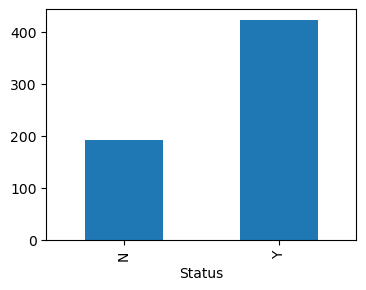

In [3]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

GroupedData=LoanData.groupby('Status').size()
GroupedData.plot(kind='bar', figsize=(4,3))

#### data exploration
    head() : This helps to see a few sample rows of the data
    info() : This provides the summarized information of the data
    describe() : This provides the descriptive statistical details of the data
    nunique(): This helps us to identify if a column is categorical or continuous

In [4]:
LoanData.head(5)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [5]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
LoanData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 62.4+ KB


In [6]:
# Looking at the descriptive statistics of the data
LoanData.describe(include='all')

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
count,601,611,599,614,582,6.140000e+02,6.140000e+02,6.140000e+02,600.00000,564.000000,614,614
unique,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,5.403459e+05,1.621246e+05,1.414104e+07,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,6.109042e+05,2.926248e+05,8.815682e+06,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1.500000e+04,0.000000e+00,0.000000e+00,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2.877500e+05,0.000000e+00,9.800000e+06,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3.812500e+05,1.188500e+05,1.250000e+07,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,5.795000e+05,2.297250e+05,1.647500e+07,360.00000,1.000000,NaN,NaN


In [7]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
LoanData.nunique()

Gender                  2
Married                 2
Dependents              4
Education               2
Self_Employed           2
Applicant_Income      505
Coapplicant_Income    287
Loan_Amount           204
Term                   10
Credit_History          2
Area                    3
Status                  2
dtype: int64

#### Visual Exploratory Data Analysis¶
    Categorical variables: Bar plot or countplot
    Continuous variables: Histogram

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

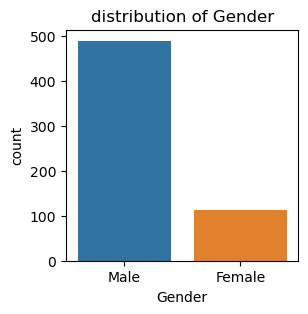

In [9]:
# distribution of Gender 
plt.figure(figsize=(3,3))
sns.countplot(x="Gender",data=LoanData)
plt.title("distribution of Gender")
plt.show()

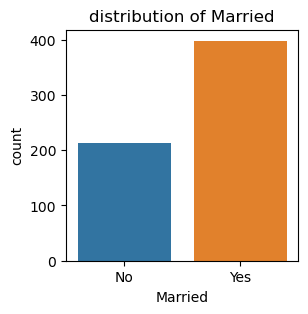

In [10]:
# distribution of Gender 
plt.figure(figsize=(3,3))
sns.countplot(x="Married",data=LoanData)
plt.title("distribution of Married")
plt.show()

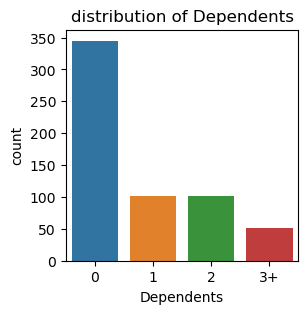

In [11]:
# distribution of Dependents
plt.figure(figsize=(3,3))
sns.countplot(x="Dependents",data=LoanData)
plt.title("distribution of Dependents")
plt.show()

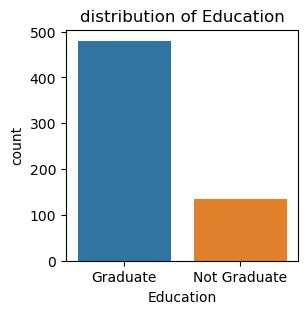

In [12]:
# distribution of Education
plt.figure(figsize=(3,3))
sns.countplot(x="Education",data=LoanData)
plt.title("distribution of Education")
plt.show()

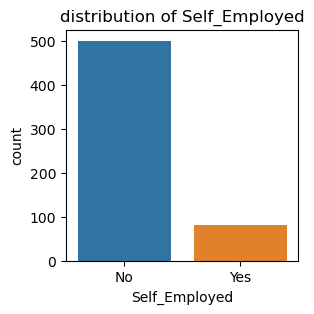

In [13]:
# distribution of Self_Employed
plt.figure(figsize=(3,3))
sns.countplot(x="Self_Employed",data=LoanData)
plt.title("distribution of Self_Employed")
plt.show()

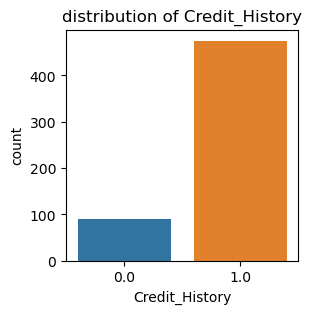

In [14]:
# distribution of Credit_History
plt.figure(figsize=(3,3))
sns.countplot(x="Credit_History",data=LoanData)
plt.title("distribution of Credit_History")
plt.show()

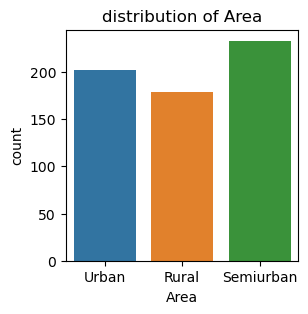

In [15]:
# distribution of Area
plt.figure(figsize=(3,3))
sns.countplot(x="Area",data=LoanData)
plt.title("distribution of Area")
plt.show()

#### Bar Charts Interpretation

These bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.

The ideal bar chart looks like the chart of "Property_Area" column. Where each category has comparable frequency. 
Hence, there are enough rows for each category in the data for the ML algorithm to learn.

array([[<Axes: title={'center': 'Applicant_Income'}>,
        <Axes: title={'center': 'Coapplicant_Income'}>],
       [<Axes: title={'center': 'Loan_Amount'}>, <Axes: >]], dtype=object)

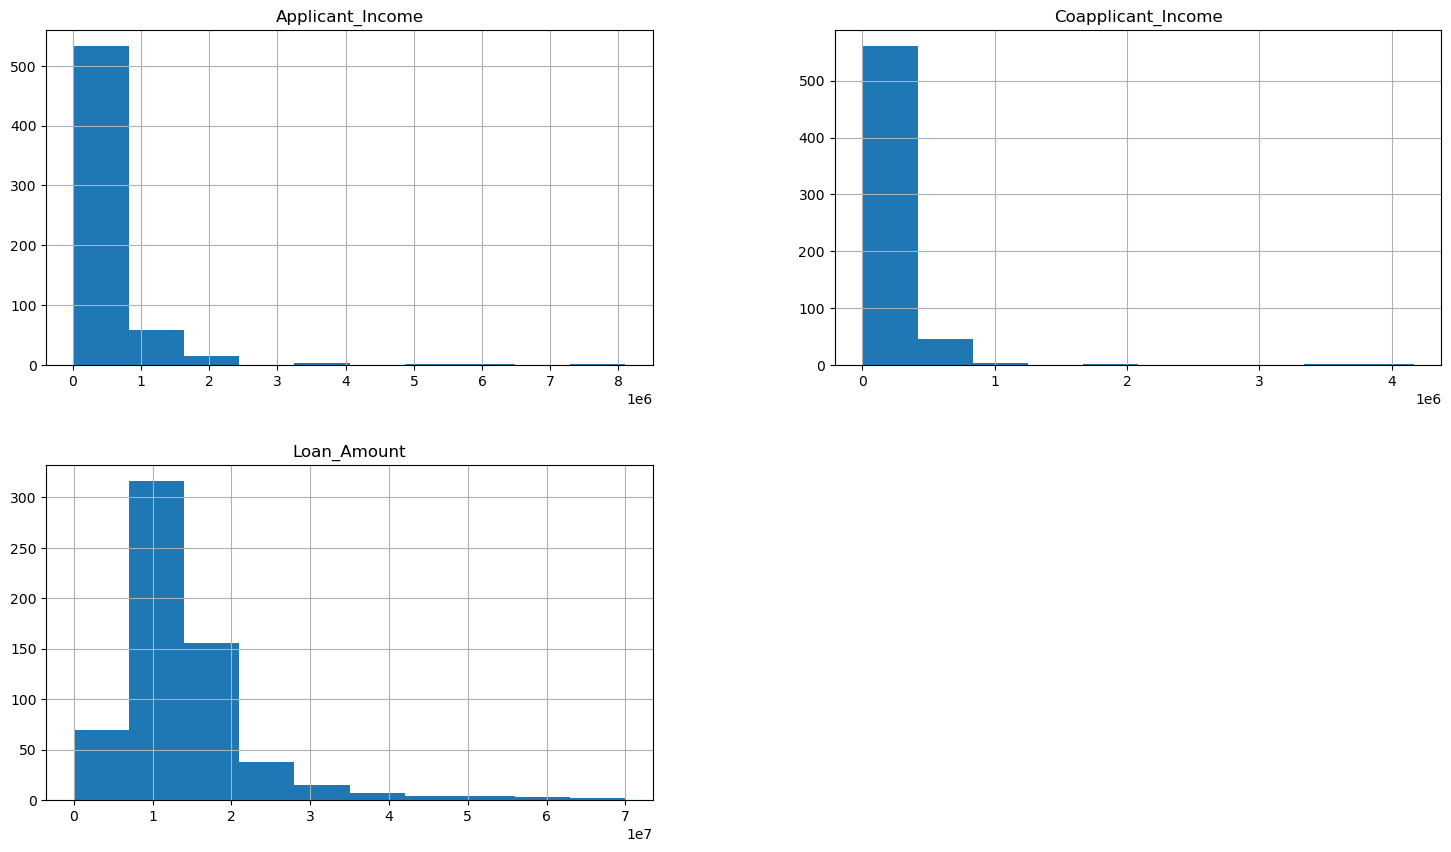

In [16]:
# Plotting histograms of multiple columns together
# Observe that ApplicantIncome and CoapplicantIncome has outliers
LoanData.hist(['Applicant_Income','Coapplicant_Income','Loan_Amount'], figsize=(18,10))

#### Histogram Interpretation

Selected Continuous Variables:
ApplicantIncome : Selected. Outliers seen beyond 30000, need to treat them.
CoapplicantIncome: Selected. Outliers seen beyond 15000, need to treat them.
LoanAmount: Selected. Slightly skewed distribution, acceptable.

### Outlier treatment

#### Replacing outliers for 'Applicant_Income'

In [17]:
# Finding nearest values to 30000 mark
LoanData['Applicant_Income'][LoanData['Applicant_Income']>2000000].sort_values()

130    2016600
308    2023300
284    2066700
506    2083300
126    2380300
183    3384600
443    3771900
185    3914700
155    3999900
171    5176300
333    6333700
409    8100000
Name: Applicant_Income, dtype: int64

In [18]:
# Replacing outliers with nearest possibe value
LoanData['Applicant_Income'][LoanData['Applicant_Income']>3000000] = 2380300

#### Replacing outliers for 'Coapplicant_Income'

In [19]:
# Finding nearest values to 15000 mark
LoanData['Coapplicant_Income'][LoanData['Coapplicant_Income']>1000000].sort_values()

9      1096800.0
177    1130000.0
402    2000000.0
417    2000000.0
581    3383700.0
600    4166700.0
Name: Coapplicant_Income, dtype: float64

Above result shows the nearest logical value is 1130000, hence, replacing any value above 1500000 with it.

In [20]:
# Replacing outliers with nearest possibe value
LoanData['Coapplicant_Income'][LoanData['Coapplicant_Income']>1500000] = 1130000

### Visualizing distribution after outlier treatment

array([[<Axes: title={'center': 'Applicant_Income'}>,
        <Axes: title={'center': 'Coapplicant_Income'}>]], dtype=object)

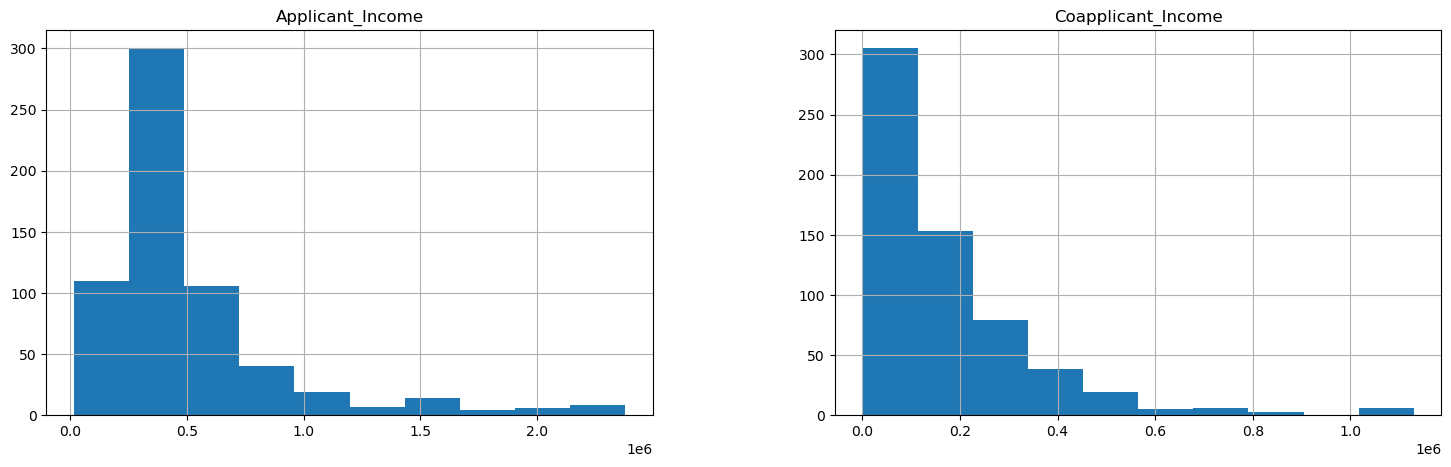

In [21]:
LoanData.hist(['Applicant_Income', 'Coapplicant_Income'], figsize=(18,5))

### Missing values treatment

In [22]:
# Finding how many missing values 
LoanData.isnull().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64

In [23]:
# Imputing the missing values

# MODE for categorical columns
LoanData['Gender'].fillna(LoanData['Gender'].mode()[0], inplace=True)
LoanData['Married'].fillna(LoanData['Married'].mode()[0], inplace=True)
LoanData['Dependents'].fillna(LoanData['Dependents'].mode()[0], inplace=True)
LoanData['Self_Employed'].fillna(LoanData['Self_Employed'].mode()[0], inplace=True)
# Using Mode value for Loan_Amount_Term since it is a categorical variable
LoanData['Term'].fillna(LoanData['Term'].mode()[0], inplace=True)
LoanData['Credit_History'].fillna(LoanData['Credit_History'].mode()[0], inplace=True)



In [24]:
# Checking missing values after the treatment
LoanData.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Term                  0
Credit_History        0
Area                  0
Status                0
dtype: int64

### Feature Selection

In [25]:
#Relationship exploration: Categorical Vs Continuous -- Box Plots

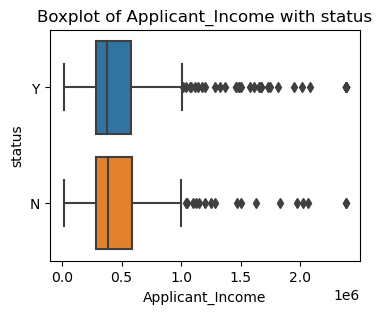

In [26]:
# Plot boxplot of Applicant_Income with status
plt.figure(figsize=(4, 3))
sns.boxplot(x=LoanData['Applicant_Income'], y=LoanData['Status'])
plt.xlabel('Applicant_Income')
plt.ylabel('status')
plt.title('Boxplot of Applicant_Income with status')
plt.show()

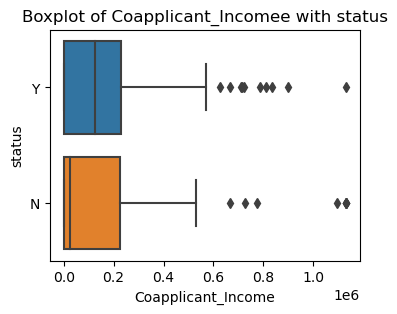

In [27]:
plt.figure(figsize=(4, 3))
sns.boxplot(x=LoanData['Coapplicant_Income'], y=LoanData['Status'])
plt.xlabel('Coapplicant_Income')
plt.ylabel('status')
plt.title('Boxplot of Coapplicant_Incomee with status')
plt.show()

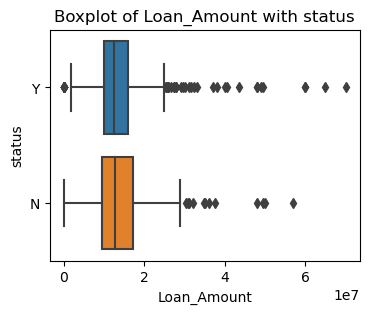

In [28]:
plt.figure(figsize=(4, 3))
sns.boxplot(x=LoanData['Loan_Amount'], y=LoanData['Status'])
plt.xlabel('Loan_Amount')
plt.ylabel('status')
plt.title('Boxplot of Loan_Amount with status')
plt.show()

### Statistical Feature Selection

In [29]:
#Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test

In [30]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [31]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=['Applicant_Income', 'Coapplicant_Income','Loan_Amount']
FunctionAnova(inpData=LoanData, TargetVariable='Status', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

Applicant_Income is NOT correlated with Status | P-Value: 0.9529534007092838
Coapplicant_Income is NOT correlated with Status | P-Value: 0.6651120750168427
Loan_Amount is NOT correlated with Status | P-Value: 0.8280708900513413


[]

In [32]:
#Relationship exploration: Categorical Vs Categorical -- Grouped Bar Charts

In [33]:
# Cross tablulation between two categorical variables
crosstab_result=pd.crosstab(LoanData['Gender'],LoanData['Status'])
crosstab_result

Status,N,Y
Gender,,
Female,37,75
Male,155,347


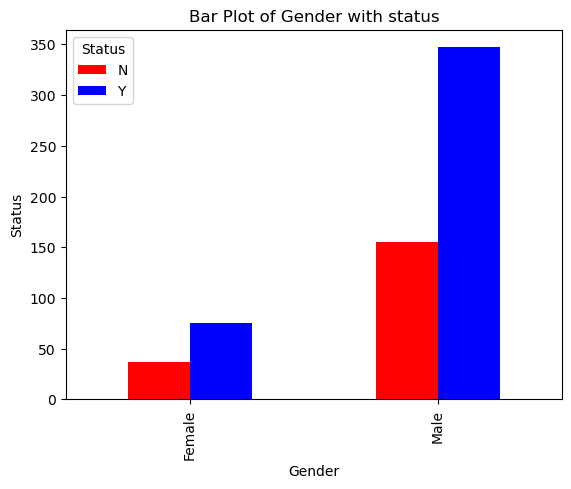

In [34]:
crosstab_result=pd.crosstab(LoanData['Gender'], LoanData['Status'])
crosstab_result.plot.bar(color=['red','blue'])

plt.xlabel('Gender')
plt.ylabel('Status')
plt.title('Bar Plot of Gender with status')

# Show the plot
plt.show()

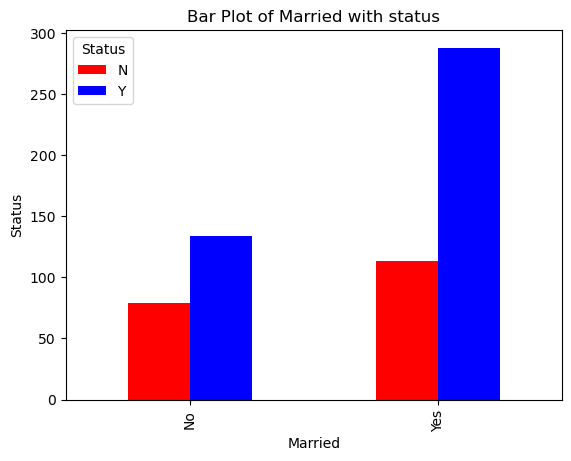

In [35]:
crosstab_result=pd.crosstab(LoanData['Married'], LoanData['Status'])
crosstab_result.plot.bar(color=['red','blue'])

plt.xlabel('Married')
plt.ylabel('Status')
plt.title('Bar Plot of Married with status')

# Show the plot
plt.show()

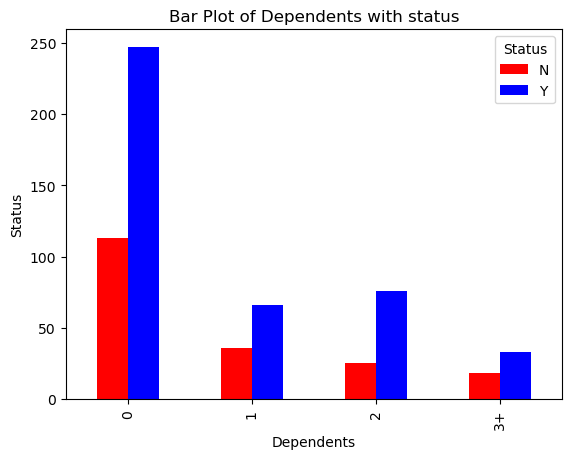

In [36]:
crosstab_result=pd.crosstab(LoanData['Dependents'], LoanData['Status'])
crosstab_result.plot.bar(color=['red','blue'])

plt.xlabel('Dependents')
plt.ylabel('Status')
plt.title('Bar Plot of Dependents with status')

# Show the plot
plt.show()

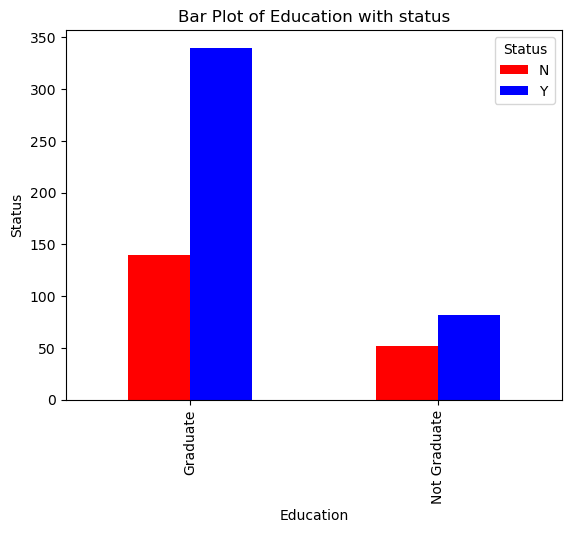

In [37]:
crosstab_result=pd.crosstab(LoanData['Education'], LoanData['Status'])
crosstab_result.plot.bar(color=['red','blue'])

plt.xlabel('Education')
plt.ylabel('Status')
plt.title('Bar Plot of Education with status')

# Show the plot
plt.show()

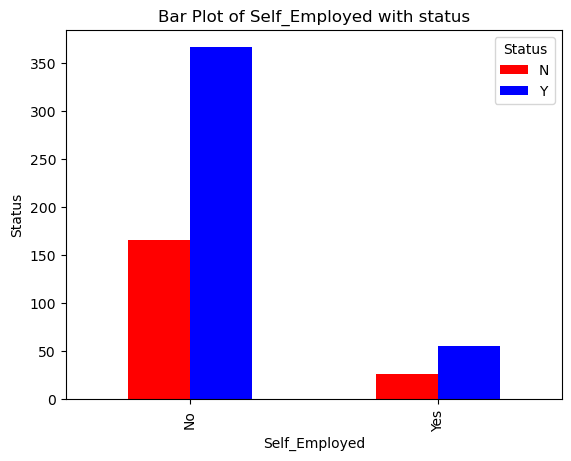

In [38]:
crosstab_result=pd.crosstab(LoanData['Self_Employed'], LoanData['Status'])
crosstab_result.plot.bar(color=['red','blue'])

plt.xlabel('Self_Employed')
plt.ylabel('Status')
plt.title('Bar Plot of Self_Employed with status')

# Show the plot
plt.show()

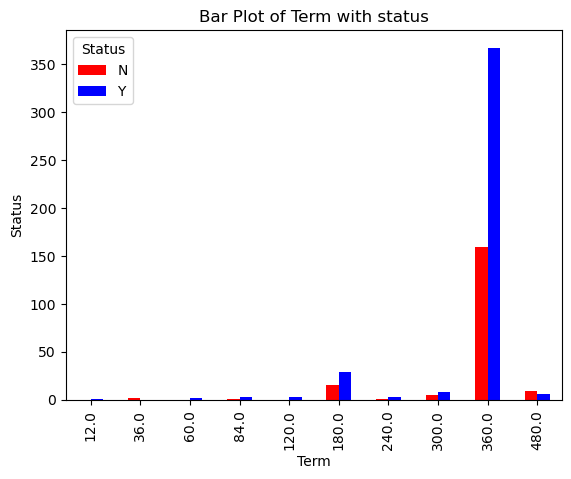

In [39]:
crosstab_result=pd.crosstab(LoanData['Term'], LoanData['Status'])
crosstab_result.plot.bar(color=['red','blue'])

plt.xlabel('Term')
plt.ylabel('Status')
plt.title('Bar Plot of Term with status')

# Show the plot
plt.show()

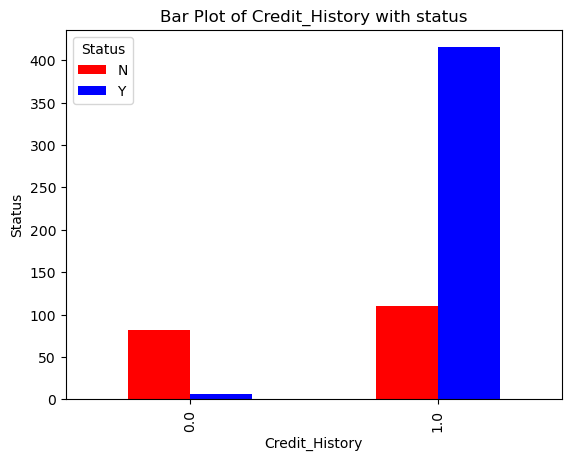

In [40]:
crosstab_result=pd.crosstab(LoanData['Credit_History'], LoanData['Status'])
crosstab_result.plot.bar(color=['red','blue'])

plt.xlabel('Credit_History')
plt.ylabel('Status')
plt.title('Bar Plot of Credit_History with status')

# Show the plot
plt.show()

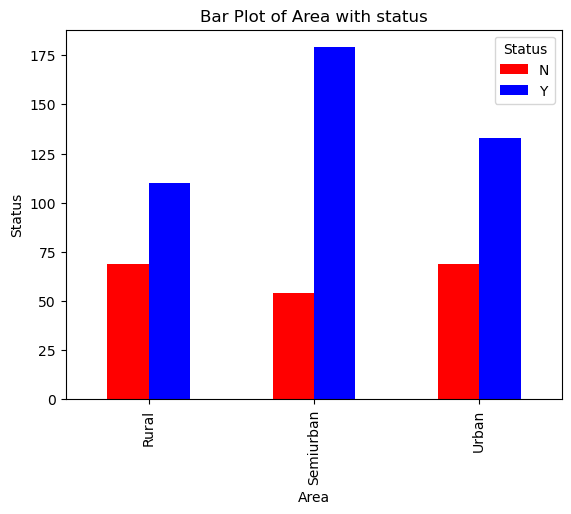

In [41]:
crosstab_result=pd.crosstab(LoanData['Area'], LoanData['Status'])
crosstab_result.plot.bar(color=['red','blue'])

plt.xlabel('Area')
plt.ylabel('Status')
plt.title('Bar Plot of Area with status')

# Show the plot
plt.show()

In [42]:
#Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test

In [43]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        crosstab_result=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(crosstab_result)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [44]:
CategoricalVariables=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Term', 'Credit_History', 'Area']

# Calling the function
FunctionChisq(inpData=LoanData, 
              TargetVariable='Status',
              CategoricalVariablesList= CategoricalVariables)

Gender is NOT correlated with Status | P-Value: 0.7391461310869638
Married is correlated with Status | P-Value: 0.029608580862582116
Dependents is NOT correlated with Status | P-Value: 0.3688663081366005
Education is correlated with Status | P-Value: 0.04309962129357355
Self_Employed is NOT correlated with Status | P-Value: 1.0
Term is NOT correlated with Status | P-Value: 0.13058516348934335
Credit_History is correlated with Status | P-Value: 3.4183499979091188e-40
Area is correlated with Status | P-Value: 0.0021360187811644915


['Married', 'Education', 'Credit_History', 'Area']

#### Selecting final predictors for Machine Learning
    Based on the above tests, selecting the final columns for machine learning

In [45]:
SelectedColumns=['Married', 'Education', 'Credit_History', 'Area']

# Selecting final columns
DataForML=LoanData[SelectedColumns]
DataForML.head()

,Married,Education,Credit_History,Area
0,No,Graduate,1.0,Urban
1,Yes,Graduate,1.0,Rural
2,Yes,Graduate,1.0,Urban
3,Yes,Not Graduate,1.0,Urban
4,No,Graduate,1.0,Urban


#### Data Pre-processing for Machine Learning

In [46]:
# Treating the binary nominal variables first
DataForML['Married'].replace({'Yes':1, 'No':0}, inplace=True)
DataForML['Education'].replace({'Graduate':1, 'Not Graduate':0}, inplace=True)

# Looking at data after nominal treatment
DataForML.head()

,Married,Education,Credit_History,Area
0,0,1,1.0,Urban
1,1,1,1.0,Rural
2,1,1,1.0,Urban
3,1,0,1.0,Urban
4,0,1,1.0,Urban


In [47]:
# Converting the nominal variable to numeric using get_dummies()


# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['Status']=LoanData['Status']

# Printing sample rows
DataForML_Numeric.head()

,Married,Education,Credit_History,Area_Rural,Area_Semiurban,Area_Urban,Status
0,0,1,1.0,0,0,1,Y
1,1,1,1.0,1,0,0,N
2,1,1,1.0,0,0,1,Y
3,1,0,1.0,0,0,1,Y
4,0,1,1.0,0,0,1,Y


#### Machine Learning: Splitting the data into Training and Testing sample

In [48]:
DataForML_Numeric.columns

Index(['Married', 'Education', 'Credit_History', 'Area_Rural',
       'Area_Semiurban', 'Area_Urban', 'Status'],
      dtype='object')

In [49]:
# Separate Target Variable and Predictor Variables
TargetVariable='Status'
Predictors=['Married', 'Education', 'Credit_History', 'Area_Rural',
       'Area_Semiurban', 'Area_Urban']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

#### Standardization/Normalization of data

In [50]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(429, 6)
(429,)
(185, 6)
(185,)


#### Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')


LO=clf.fit(X_train,y_train)
prediction=LO.predict(X_test)

from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

from sklearn.model_selection import cross_val_score


Accuracy_Values=cross_val_score(LO, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

           N       0.93      0.42      0.57        65
           Y       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185

[[ 27  38]
 [  2 118]]
Accuracy of the model on Testing Sample Data: 0.76

Accuracy values for 10-fold Cross Validation:
 [0.7736365  0.80345413 0.73991935 0.71603296 0.7558112  0.7558112
 0.85706819 0.84147582 0.77861378 0.81551149]

Final Average Accuracy of the model: 0.78


#### Decision Trees

In [76]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=2,criterion='entropy')


DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

from sklearn.model_selection import cross_val_score
Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

           N       0.93      0.42      0.57        65
           Y       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185

[[ 27  38]
 [  2 118]]
Accuracy of the model on Testing Sample Data: 0.76

Accuracy values for 10-fold Cross Validation:
 [0.7736365  0.80345413 0.73991935 0.71603296 0.7558112  0.7558112
 0.85706819 0.84147582 0.77861378 0.81551149]

Final Average Accuracy of the model: 0.78


#### Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, n_estimators=100,criterion='gini')

RF=clf.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))


from sklearn.model_selection import cross_val_score
Accuracy_Values=cross_val_score(RF, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

           N       0.93      0.42      0.57        65
           Y       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185

[[ 27  38]
 [  2 118]]
Accuracy of the model on Testing Sample Data: 0.76

Accuracy values for 10-fold Cross Validation:
 [0.7736365  0.80345413 0.73991935 0.71603296 0.7558112  0.7558112
 0.85706819 0.84147582 0.77861378 0.81551149]

Final Average Accuracy of the model: 0.78


#### Adaboost

In [79]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

DTC=DecisionTreeClassifier(max_depth=1)
clf = AdaBoostClassifier(n_estimators=500, base_estimator=DTC ,learning_rate=0.01)

AB=clf.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

from sklearn.model_selection import cross_val_score
Accuracy_Values=cross_val_score(AB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

           N       0.93      0.42      0.57        65
           Y       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185

[[ 27  38]
 [  2 118]]
Accuracy of the model on Testing Sample Data: 0.76

Accuracy values for 10-fold Cross Validation:
 [0.7736365  0.80345413 0.73991935 0.71603296 0.7558112  0.7558112
 0.85706819 0.84147582 0.77861378 0.81551149]

Final Average Accuracy of the model: 0.78
